In [49]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [50]:
data = pd.read_csv("Creditcard_data.csv")

In [51]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
data.shape

(772, 31)

NameError: name 'plt' is not defined

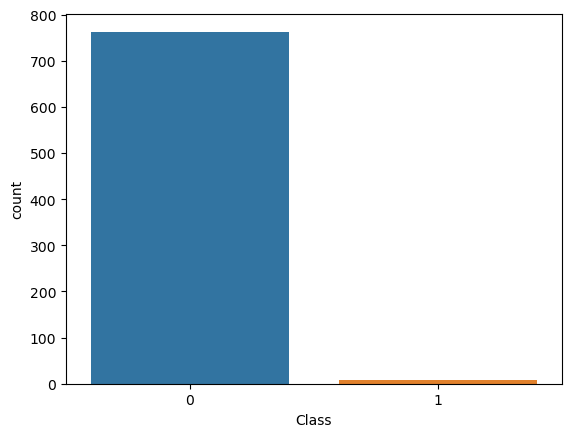

In [53]:
sns.countplot(x="Class", data=data)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Binary Class Distribution')

plt.show()

In [54]:
x = data.iloc[:,1:29]

In [55]:
y = data.iloc[:,-1]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
train_class_dist = y_train.value_counts(normalize=True)
test_class_dist = y_test.value_counts(normalize=True)

print("Training set class distribution:\n", train_class_dist)
print("Testing set class distribution:\n", test_class_dist)

Training set class distribution:
 0    0.988655
1    0.011345
Name: Class, dtype: float64
Testing set class distribution:
 0    0.987097
1    0.012903
Name: Class, dtype: float64


In [58]:
print(X_train.shape)
print(y_train.shape)

(617, 28)
(617,)


In [59]:
#Random Oversampling
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

sample_size = len(X_train_resampled) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [60]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
	AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.17      0.50      0.25         2

    accuracy                           0.96       155
   macro avg       0.58      0.73      0.62       155
weighted avg       0.98      0.96      0.97       155

	RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.50      0.67         2

    accuracy                           0.99       155
   macro avg       1.00      0.75      0.83       155
weighted avg       0.99      0.99      0.99       155

	ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.50      0.67         2

    accuracy                           0.99       155
   macro avg       1.00      0.75      0.83      

In [61]:
#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

sample_size = len(X_train) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [62]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
	AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      0.58      0.73       153
           1       0.02      0.50      0.03         2

    accuracy                           0.58       155
   macro avg       0.50      0.54      0.38       155
weighted avg       0.98      0.58      0.72       155

	RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.45      0.62       153
           1       0.01      0.50      0.02         2

    accuracy                           0.45       155
   macro avg       0.50      0.48      0.32       155
weighted avg       0.97      0.45      0.61       155

	ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.99      0.55      0.71       153
           1       0.01      0.50      0.03         2

    accuracy                           0.55       155
   macro avg       0.50      0.52      0.37      

In [63]:
#Combined sampling(SMOTE)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

sample_size = len(X_train) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [64]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
	AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       153
           1       0.06      0.50      0.11         2

    accuracy                           0.89       155
   macro avg       0.53      0.70      0.52       155
weighted avg       0.98      0.89      0.93       155

	RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.50      0.50      0.50         2

    accuracy                           0.99       155
   macro avg       0.75      0.75      0.75       155
weighted avg       0.99      0.99      0.99       155

	ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.20      0.50      0.29         2

    accuracy                           0.97       155
   macro avg       0.60      0.74      0.63      

In [65]:
#ADASYN sampling
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

sample_size = len(X_train) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [66]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
	AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       153
           1       0.12      0.50      0.20         2

    accuracy                           0.95       155
   macro avg       0.56      0.73      0.59       155
weighted avg       0.98      0.95      0.96       155

	RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.33      0.50      0.40         2

    accuracy                           0.98       155
   macro avg       0.66      0.74      0.70       155
weighted avg       0.98      0.98      0.98       155

	ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.50      0.50      0.50         2

    accuracy                           0.99       155
   macro avg       0.75      0.75      0.75      

In [69]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report

eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)

# create 5 samples
sample_size = len(X_train_resampled) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    eec.fit(X_sample, y_sample)
    y_pred = eec.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=1))

Sample 1:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.17      0.50      0.25         2

    accuracy                           0.96       155
   macro avg       0.58      0.73      0.62       155
weighted avg       0.98      0.96      0.97       155

Sample 2:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       153
           1       0.14      0.50      0.22         2

    accuracy                           0.95       155
   macro avg       0.57      0.73      0.60       155
weighted avg       0.98      0.95      0.97       155

Sample 3:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.00      0.00      0.00         2

    accuracy                           0.97       155
   macro avg       0.49      0.49      0.49       155
weighted avg       0.97      0.97      0.97 

In [39]:
from sklearn.metrics import precision_recall_curve, auc

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]

for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_scores = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        pr_auc = auc(recall, precision)
        print(f"\t\tPR AUC: {pr_auc:.3f}")

Sample 1:
	AdaBoostClassifier:
		PR AUC: 0.505
	RandomForestClassifier:
		PR AUC: 0.506
	ExtraTreesClassifier:
		PR AUC: 0.505
	GradientBoostingClassifier:
		PR AUC: 0.506
	XGBClassifier:
		PR AUC: 0.505
Sample 2:
	AdaBoostClassifier:
		PR AUC: 0.130
	RandomForestClassifier:
		PR AUC: 0.508
	ExtraTreesClassifier:
		PR AUC: 0.506
	GradientBoostingClassifier:
		PR AUC: 0.506
	XGBClassifier:
		PR AUC: 0.506
Sample 3:
	AdaBoostClassifier:
		PR AUC: 0.130
	RandomForestClassifier:
		PR AUC: 0.508
	ExtraTreesClassifier:
		PR AUC: 0.505
	GradientBoostingClassifier:
		PR AUC: 0.508
	XGBClassifier:
		PR AUC: 0.512
Sample 4:
	AdaBoostClassifier:
		PR AUC: 0.505
	RandomForestClassifier:
		PR AUC: 0.505
	ExtraTreesClassifier:
		PR AUC: 0.506
	GradientBoostingClassifier:
		PR AUC: 0.505
	XGBClassifier:
		PR AUC: 0.506
Sample 5:
	AdaBoostClassifier:
		PR AUC: 0.507
	RandomForestClassifier:
		PR AUC: 0.506
	ExtraTreesClassifier:
		PR AUC: 0.508
	GradientBoostingClassifier:
		PR AUC: 0.506
	XGBClassifi